In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
file1=pd.read_csv(mouse_drug_data_to_load)
file2=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
file=pd.merge(file1,file2, on="Mouse ID", how="outer")

# Display the data table for preview
#1906 rows 5 columns
file.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
file_new=file[["Drug","Timepoint","Tumor Volume (mm3)"]]
file_new_gr=file_new.groupby(["Drug","Timepoint"])
file_new_gr_mean=file_new_gr.mean()
# Convert to DataFrame
tumor_response_mean=file_new_gr_mean.reset_index()
# Preview DataFrame
tumor=tumor_response_mean
tumor_response_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
file_new_gr_sterr=file_new_gr.sem()
file_new_gr_sterr.head()
# Convert to DataFrame
tumor_response_sterr=file_new_gr_sterr.reset_index()
# Preview DataFrame
tumor_response_sterr.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_mean=tumor_response_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_response_sterr=tumor_response_sterr.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_response_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Generate the Plot (with Error Bars)
x_axis=[i for i in tumor_response_mean.index]
y_axis_cap=tumor_response_mean["Capomulin"]
y_axis_inf=tumor_response_mean["Infubinol"]
y_axis_ket=tumor_response_mean["Ketapril"]
y_axis_pl=tumor_response_mean["Placebo"]

err_cap=tumor_response_sterr["Capomulin"]
err_inf=tumor_response_sterr["Infubinol"]
err_ket=tumor_response_sterr["Ketapril"]
err_pl=tumor_response_sterr["Placebo"]

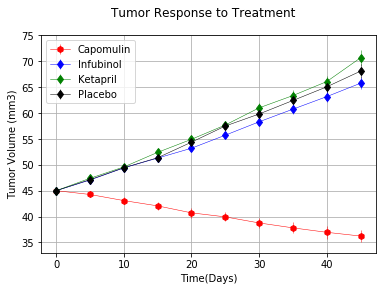

In [6]:
fig,ax=plt.subplots()
ax.errorbar(x_axis,y_axis_cap,yerr=err_cap, marker='h',linewidth=0.5, color="r",label="Capomulin")
ax.errorbar(x_axis,y_axis_inf,yerr=err_inf, marker='d',linewidth=0.5, color="b",label="Infubinol")
ax.errorbar(x_axis,y_axis_ket,yerr=err_ket, marker='d',linewidth=0.5, color="g",label="Ketapril")
ax.errorbar(x_axis,y_axis_pl,yerr=err_pl, marker='d',linewidth=0.5, color="black",label="Placebo")
ax.set_ylim(33,75)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
fig.suptitle("Tumor Response to Treatment")
plt.grid()
# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
file_new=file[["Drug","Timepoint","Metastatic Sites"]]
file_new_gr=file_new.groupby(["Drug","Timepoint"])
file_new_gr_mean=file_new_gr.mean()
# Convert to DataFrame
metastatic_response_mean=file_new_gr_mean.reset_index()
# Preview DataFrame
metastatic_response_mean.head()
file_new_gr_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
file_new_gr_meterr=file_new_gr.sem()
file_new_gr_meterr.head()
# Convert to DataFrame
metastatic_response_err=file_new_gr_meterr.reset_index()
# Preview DataFrame
metastatic_response_err.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
file_new_gr_meterr.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_mean=metastatic_response_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metastatic_response_err=metastatic_response_err.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metastatic_response_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
x_axis=[i for i in metastatic_response_mean.index]
y_axis_cap=metastatic_response_mean["Capomulin"]
err_cap=metastatic_response_err["Capomulin"]

y_axis_inf=metastatic_response_mean["Infubinol"]
err_inf=metastatic_response_err["Infubinol"]

y_axis_ket=metastatic_response_mean["Ketapril"]
err_ket=metastatic_response_err["Ketapril"]

y_axis_pl=metastatic_response_mean["Placebo"]
err_pl=metastatic_response_err["Placebo"]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

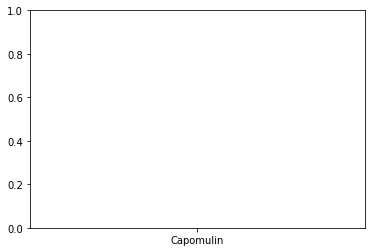

In [21]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots()
ax.errorbar(x_axis,y_axis_cap,yerr=err_cap,marker="8",color="r",label="Capomulin",linewidth=0.5)
ax.errorbar(x_axis,y_axis_inf,yerr=err_inf,marker="^",color="b",label="Infubinol",linewidth=0.5)
ax.errorbar(x_axis,y_axis_ket,yerr=err_ket,marker="s",color="g",label="Ketapril",linewidth=0.5)
ax.errorbar(x_axis,y_axis_pl,yerr=err_pl,marker="d",color="black",label="Placebo",linewidth=0.5)
plt.legend(loc="best")
ax.set_xlabel("Treatment duration (Days)")
ax.set_ylabel("Met.Sites")
fig.suptitle("Metastatic Spread During Treatment")
plt.grid()
# Save the Figure
plt.savefig("Metastatic_Response_to_Treatment.png")
# Show the Figure
plt.show()
# Save the Figure
plt.savefig("Metastatic_Response_to_Treatment.png")

In [14]:
# Save the Figure
plt.savefig("Metastatic_Response_to_Treatment.png")

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
file_new=file[["Drug","Timepoint","Mouse ID"]]
file_new_gr=file_new.groupby(["Drug","Timepoint"])
file_new_gr_count=file_new_gr.count()
# Convert to DataFrame
survival_rates=file_new_gr_count.reset_index()
# Preview DataFrame
survival_rates.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates=survival_rates.pivot(index="Timepoint",columns="Drug")["Mouse ID"]
# Preview the Data Frame
survival_rates

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [17]:
x_axis=[i for i in survival_rates.index]
y_axis_cap=survival_rates["Capomulin"]/survival_rates.loc[0,"Capomulin"]*100
y_axis_inf=survival_rates["Infubinol"]/survival_rates.loc[0,"Infubinol"]*100
y_axis_ket=survival_rates["Ketapril"]/survival_rates.loc[0,"Ketapril"]*100
y_axis_pl=survival_rates["Placebo"]/survival_rates.loc[0,"Placebo"]*100

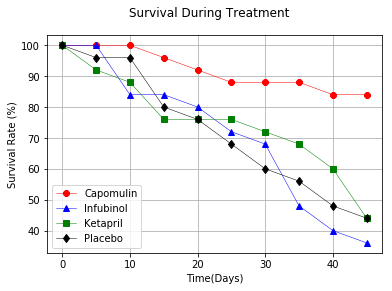

In [18]:
# Generate the Plot (Accounting for percentages)
fig,ax=plt.subplots()
ax.plot(x_axis,y_axis_cap,marker="8",color="r",linewidth=0.5,label="Capomulin")
ax.plot(x_axis,y_axis_inf,marker="^",color="b",linewidth=0.5,label="Infubinol")
ax.plot(x_axis,y_axis_ket,marker="s",color="g",linewidth=0.5,label="Ketapril")
ax.plot(x_axis,y_axis_pl,marker="d",color="black",linewidth=0.5,label="Placebo")
plt.legend(loc="best")
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Survival Rate (%)")
fig.suptitle("Survival During Treatment")
plt.grid()
# Save the Figure
plt.savefig("Survival Rates.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
summary_bar_graph=tumor.pivot(index="Drug",columns="Timepoint")["Tumor Volume (mm3)"]
summary_bar_graph["%"]=(summary_bar_graph[45]-summary_bar_graph[0])/summary_bar_graph[0]*100
# Display the data to confirm
summary_bar_graph["%"]


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: %, dtype: float64

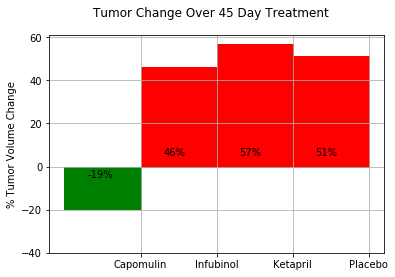

In [20]:
# Store all Relevant Percent Changes into a Tuple
summary=summary_bar_graph["%"]
summary_choice=summary[['Capomulin','Infubinol','Ketapril','Placebo']]
x_axis=summary_choice.index
y_axis=summary_choice.values

#Plot
fig,ax=plt.subplots()
barlist=ax.bar(x_axis,y_axis,align="edge",width=-1)
#Color
for i in range(0,len(y_axis)):   
    if y_axis[i]>0:
        barlist[i].set_color('r')
    else:
        barlist[i].set_color('g')
    
#Labels
labels=[int(i) for i in y_axis]
for i in range(0,len(labels)):
    if labels[i]>0:
        ax.text(x=i-0.7,y=5,s=f"{labels[i]}%")
    else:
        ax.text(x=i-0.7,y=-5,s=f"{labels[i]}%")

#Aestetics
plt.ylabel("% Tumor Volume Change")
fig.suptitle("Tumor Change Over 45 Day Treatment")
plt.yticks(range(-40,80,20))
plt.grid(True)

# Save the Figure
plt.savefig("Tumor_change_over_treatment.png")
# Show the Figure
fig.show()
